# CGNN Example on the LUCAS (LUng CAncer Simple set) dataset 

Source : www.causality.inf.ethz.ch/data/LUCAS.html

The true dataset is the **lucas0_train.csv** file ; we use the **NUM_LUCAS.csv** file, representing a graph with continuous data which structure is the same as the true LUCAS dataset.
**Goal** : Find the causal structure of the graph using CGNN, starting from the raw data.

In [1]:
#Import libraries
import cdt
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
#Hardware parameters
cdt.SETTINGS.GPU = True
if cdt.SETTINGS.GPU_LIST == [] and cdt.SETTINGS.GPU:
    cdt.SETTINGS.GPU_LIST = [0]
    
if cdt.SETTINGS.GPU:
    cdt.SETTINGS.NB_JOBS = len(cdt.SETTINGS.GPU_LIST)*2
#Settings for CGNN
cdt.CGNN_SETTINGS.use_Fast_MMD = False
cdt.CGNN_SETTINGS.NB_RUNS = 8
cdt.CGNN_SETTINGS.NB_MAX_RUNS = 16

#Settings for Feature Selection
cdt.CGNN_SETTINGS.nb_run_feature_selection = 1
cdt.CGNN_SETTINGS.regul_param = 0.006
cdt.CGNN_SETTINGS.threshold_UMG = 0.16

/home/diviyan/phd/CausalDiscoveryToolbox/cdt/utils/Settings.py:121: UserWarning: No GPU automatically detected. Set SETTINGS.GPU to false,SETTINGS.GPU_LIST to [], and SETTINGS.NB_JOBS to cpu_count.
  "SETTINGS.GPU_LIST to [], and SETTINGS.NB_JOBS to cpu_count.")
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in loadNamespace(name) : there is no package called ‘minet’

  warnings.warn(x, RRuntimeWarning)
/home/diviyan/phd/CausalDiscoveryToolbox/cdt/utils/R.py:34: UserWarning: R wrapper is not available : Error in loadNamespace(name) : there is no package called ‘minet’

  warnings.warn("R wrapper is not available : {}".format(e))


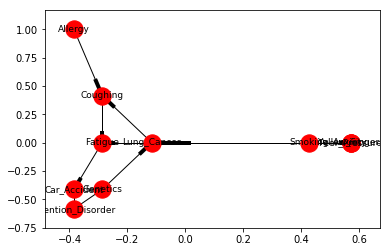

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [2]:
# Load data and graph solution
data = pd.read_csv("NUM_LUCAS.csv")
solution = cdt.DirectedGraph(pd.read_csv("Lucas_graph.csv"))  
solution.plot() # The plot function allows for quick visualization of the graph. 
# For a more detailed view of the network, please use the .to_list() function to export the graph to another format  
# importable by other libraries (graphviz, gephi).
data.head()

In [3]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN
Fsgnn = FSGNN()
start_time = time.time()
ugraph = Fsgnn.create_skeleton_from_data(data)
print("--- Execution time : %s seconds ---" % (time.time() - start_time))
ugraph.plot()
# List results
pd.DataFrame(ugraph.list_edges())

500
500
Feature selection for target Allergy
Feature selection for target Anxiety
PIter:0, score:0.032846517860889435, model complexity:8.141069412231445 
PIter:300, score:0.013993942178785801, model complexity:0.6967369914054871 
PIter:600, score:0.008591867983341217, model complexity:0.8473299741744995 
PIter:900, score:0.007990722544491291, model complexity:0.7642724514007568 
PIter:1200, score:0.007868442684412003, model complexity:0.6567240357398987 
PIter:1500, score:0.007654138840734959, model complexity:0.633206844329834 
PIter:1800, score:0.00744973961263895, model complexity:0.6065884232521057 
500
Feature selection for target Genetics
PIter:0, score:0.03537673130631447, model complexity:8.179070472717285 
PIter:300, score:0.005400222726166248, model complexity:0.8581146597862244 
PIter:600, score:0.004967678803950548, model complexity:0.7037262320518494 
PIter:900, score:0.004710766486823559, model complexity:0.6233911514282227 
PIter:1200, score:0.004383021965622902, model 

JoblibResourceExhaustedError: JoblibResourceExhaustedError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7fac083d8ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/diviyan/miniconda2/envs/py35/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/diviya.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fac083d8ae0, file "/...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/diviyan/miniconda2/envs/py35/lib/python3.5...ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/diviya.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 30, 14, 43, 53, 832046, tzinfo=tzutc()), 'msg_id': '02A74A13B39941318352DE0C305B406E', 'msg_type': 'execute_request', 'session': '9EFDBE079DF34BB89D134BA9FD52988A', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '02A74A13B39941318352DE0C305B406E', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9EFDBE079DF34BB89D134BA9FD52988A']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 30, 14, 43, 53, 832046, tzinfo=tzutc()), 'msg_id': '02A74A13B39941318352DE0C305B406E', 'msg_type': 'execute_request', 'session': '9EFDBE079DF34BB89D134BA9FD52988A', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '02A74A13B39941318352DE0C305B406E', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9EFDBE079DF34BB89D134BA9FD52988A'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 1, 30, 14, 43, 53, 832046, tzinfo=tzutc()), 'msg_id': '02A74A13B39941318352DE0C305B406E', 'msg_type': 'execute_request', 'session': '9EFDBE079DF34BB89D134BA9FD52988A', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '02A74A13B39941318352DE0C305B406E', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-3-84c4e402fa2c>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fab61f2d278, executi..._before_exec=None error_in_exec=None result=None>)
   2797 
   2798         try:
   2799             for i, node in enumerate(to_run_exec):
   2800                 mod = ast.Module([node])
   2801                 code = compiler(mod, cell_name, "exec")
-> 2802                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fab570ec4b0, file "<ipython-input-3-84c4e402fa2c>", line 5>
        result = <ExecutionResult object at 7fab61f2d278, executi..._before_exec=None error_in_exec=None result=None>
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fab570ec4b0, file "<ipython-input-3-84c4e402fa2c>", line 5>, result=<ExecutionResult object at 7fab61f2d278, executi..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fab570ec4b0, file "<ipython-input-3-84c4e402fa2c>", line 5>
        self.user_global_ns = {'FSGNN': <class 'cdt.independence.graph.FSGNN.FSGNN'>, 'Fsgnn': <cdt.independence.graph.FSGNN.FSGNN object>, 'In': ['', '#Import libraries\nimport cdt\nimport time\n# A war...am = 0.006\ncdt.CGNN_SETTINGS.threshold_UMG = 0.16', '# Load data and graph solution\ndata = pd.read_cs...by other libraries (graphviz, gephi).\ndata.head()', '# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())'], 'Out': {2:     Allergy   Anxiety  Genetics  Peer_Pressure  ...    -0.733240 -0.149308  0.854195     -0.633940  }, '_':     Allergy   Anxiety  Genetics  Peer_Pressure  ...    -0.733240 -0.149308  0.854195     -0.633940  , '_2':     Allergy   Anxiety  Genetics  Peer_Pressure  ...    -0.733240 -0.149308  0.854195     -0.633940  , '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
        self.user_ns = {'FSGNN': <class 'cdt.independence.graph.FSGNN.FSGNN'>, 'Fsgnn': <cdt.independence.graph.FSGNN.FSGNN object>, 'In': ['', '#Import libraries\nimport cdt\nimport time\n# A war...am = 0.006\ncdt.CGNN_SETTINGS.threshold_UMG = 0.16', '# Load data and graph solution\ndata = pd.read_cs...by other libraries (graphviz, gephi).\ndata.head()', '# Finding the structure of the graph\nfrom cdt.in...\n# List results\npd.DataFrame(ugraph.list_edges())'], 'Out': {2:     Allergy   Anxiety  Genetics  Peer_Pressure  ...    -0.733240 -0.149308  0.854195     -0.633940  }, '_':     Allergy   Anxiety  Genetics  Peer_Pressure  ...    -0.733240 -0.149308  0.854195     -0.633940  , '_2':     Allergy   Anxiety  Genetics  Peer_Pressure  ...    -0.733240 -0.149308  0.854195     -0.633940  , '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/home/diviyan/phd/CausalDiscoveryToolbox/LUCAS_example/<ipython-input-3-84c4e402fa2c> in <module>()
      1 # Finding the structure of the graph
      2 from cdt.independence.graph import FSGNN
      3 Fsgnn = FSGNN()
      4 start_time = time.time()
----> 5 ugraph = Fsgnn.create_skeleton_from_data(data)
      6 print("--- Execution time : %s seconds ---" % (time.time() - start_time))
      7 ugraph.plot()
      8 # List results
      9 pd.DataFrame(ugraph.list_edges())

...........................................................................
/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py in create_skeleton_from_data(self=<cdt.independence.graph.FSGNN.FSGNN object>, data=      Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns])
    157         data = pd.DataFrame(scale(data), columns=data.columns)
    158 
    159         for _ in range(CGNN_SETTINGS.nb_run_feature_selection):
    160 
    161             result_feature_selection = Parallel(n_jobs=SETTINGS.NB_JOBS)(
--> 162                 delayed(run_feature_selection)(data, idx, node) for idx, node in enumerate(list_nodes))
        data =       Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns]
        list_nodes = ['Allergy', 'Anxiety', 'Genetics', 'Peer_Pressure', 'Attention_Disorder', 'Smoking', 'Lung_Cancer', 'Yellow_Fingers', 'Coughing', 'Fatigue', 'Car_Accident']
    163 
    164             for i in range(len(result_feature_selection)):
    165 
    166                 avg_mean = result_feature_selection[i]

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object FSGNN.create_skeleton_from_data.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ResourceExhaustedError                             Tue Jan 30 15:44:47 2018
PID: 17504      Python 3.5.4: /home/diviyan/miniconda2/envs/py35/bin/python
...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function run_feature_selection>, (      Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns], 1, 'Anxiety'), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function run_feature_selection>
        args = (      Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns], 1, 'Anxiety')
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py in run_feature_selection(df_data=      Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns], idx=1, target='Anxiety')
    131 
    132     print(df_data.shape[0])
    133 
    134     if SETTINGS.GPU:
    135         with tf.device('/gpu:' + str(SETTINGS.GPU_LIST[idx % len(SETTINGS.GPU_LIST)])):
--> 136             avg_scores = eval_feature_selection_score(df_data, target)
        avg_scores = undefined
        df_data =       Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns]
        target = 'Anxiety'
    137             return avg_scores
    138     else:
    139         avg_scores = eval_feature_selection_score(df_data, target)
    140         return avg_scores

...........................................................................
/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py in eval_feature_selection_score(df_data=      Allergy   Anxiety  Genetics  Peer_Pressure...0.858699     -1.037579  

[500 rows x 11 columns], target='Anxiety')
     85 
     86     for it in range(CGNN_SETTINGS.nb_epoch_train_feature_selection):
     87 
     88         _, G_dist_loss_curr, complexity_curr, W_in_curr = sess.run([G_solver, G_dist_loss, model_complexity, W_in],
     89                                                                    feed_dict={all_parent_variables: data_features,
---> 90                                                                               target_variable: data_target})
        target_variable = <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>
        data_target = array([[  7.69992253e-01],
       [ -1.45331337e...  [ -1.55504813e+00],
       [ -2.10284458e-01]])
     91 
     92         if verbose:
     93 
     94             if (it % 300 == 0):

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/client/session.py in run(self=<tensorflow.python.client.session.Session object>, fetches=[<tf.Operation 'Adam' type=NoOp>, <tf.Tensor 'add_10:0' shape=() dtype=float32>, <tf.Tensor 'Sum_8:0' shape=() dtype=float32>, <tf.Variable 'Variable:0' shape=(10, 20) dtype=float32_ref>], feed_dict={<tf.Tensor 'Placeholder:0' shape=(?, 10) dtype=float32>: array([[-0.49898442, -0.60855835, -0.63359172, ....  0.26132845,
         0.85869948, -1.03757892]]), <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>: array([[  7.69992253e-01],
       [ -1.45331337e...  [ -1.55504813e+00],
       [ -2.10284458e-01]])}, options=None, run_metadata=None)
    884         compat.as_bytes(options.SerializeToString())) if options else None
    885     run_metadata_ptr = tf_session.TF_NewBuffer() if run_metadata else None
    886 
    887     try:
    888       result = self._run(None, fetches, feed_dict, options_ptr,
--> 889                          run_metadata_ptr)
        run_metadata_ptr = None
    890       if run_metadata:
    891         proto_data = tf_session.TF_GetBuffer(run_metadata_ptr)
    892         run_metadata.ParseFromString(compat.as_bytes(proto_data))
    893     finally:

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/client/session.py in _run(self=<tensorflow.python.client.session.Session object>, handle=None, fetches=[<tf.Operation 'Adam' type=NoOp>, <tf.Tensor 'add_10:0' shape=() dtype=float32>, <tf.Tensor 'Sum_8:0' shape=() dtype=float32>, <tf.Variable 'Variable:0' shape=(10, 20) dtype=float32_ref>], feed_dict={<tf.Tensor 'Placeholder:0' shape=(?, 10) dtype=float32>: array([[-0.49898442, -0.60855835, -0.63359172, ....  0.26132845,
         0.85869948, -1.03757892]]), <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>: array([[  7.69992253e-01],
       [ -1.45331337e...  [ -1.55504813e+00],
       [ -2.10284458e-01]])}, options=None, run_metadata=None)
   1115     final_targets = fetch_handler.targets()
   1116     # We only want to really perform the run if fetches or targets are provided,
   1117     # or if the call is a partial run that specifies feeds.
   1118     if final_fetches or final_targets or (handle and feed_dict_tensor):
   1119       results = self._do_run(handle, final_targets, final_fetches,
-> 1120                              feed_dict_tensor, options, run_metadata)
        feed_dict_tensor = {<tf.Tensor 'Placeholder:0' shape=(?, 10) dtype=float32>: array([[-0.49898443, -0.60855836, -0.63359171, ....        0.8586995 , -1.03757894]], dtype=float32), <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>: array([[  7.69992232e-01],
       [ -1.45331335e...e+00],
       [ -2.10284457e-01]], dtype=float32)}
        options = None
        run_metadata = None
   1121     else:
   1122       results = []
   1123     return fetch_handler.build_results(self, results)
   1124 

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/client/session.py in _do_run(self=<tensorflow.python.client.session.Session object>, handle=None, target_list=[<tf.Operation 'Adam' type=NoOp>], fetch_list=[<tf.Tensor 'add_10:0' shape=() dtype=float32>, <tf.Tensor 'Sum_8:0' shape=() dtype=float32>, <tf.Tensor 'Variable:0' shape=(10, 20) dtype=float32_ref>], feed_dict={<tf.Tensor 'Placeholder:0' shape=(?, 10) dtype=float32>: array([[-0.49898443, -0.60855836, -0.63359171, ....        0.8586995 , -1.03757894]], dtype=float32), <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>: array([[  7.69992232e-01],
       [ -1.45331335e...e+00],
       [ -2.10284457e-01]], dtype=float32)}, options=None, run_metadata=None)
   1312           return tf_session.TF_PRun(session, handle, feed_dict, fetch_list,
   1313                                     status)
   1314 
   1315     if handle is None:
   1316       return self._do_call(_run_fn, self._session, feeds, fetches, targets,
-> 1317                            options, run_metadata)
        options = None
        run_metadata = None
   1318     else:
   1319       return self._do_call(_prun_fn, self._session, handle, feeds, fetches)
   1320 
   1321   def _do_call(self, fn, *args):

...........................................................................
/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/client/session.py in _do_call(self=<tensorflow.python.client.session.Session object>, fn=<function BaseSession._do_run.<locals>._run_fn>, *args=(<Swig Object of type 'TF_DeprecatedSession *'>, {b'Placeholder:0': array([[-0.49898443, -0.60855836, -0.63359171, ....        0.8586995 , -1.03757894]], dtype=float32), b'Placeholder_1:0': array([[  7.69992232e-01],
       [ -1.45331335e...e+00],
       [ -2.10284457e-01]], dtype=float32)}, [b'add_10:0', b'Sum_8:0', b'Variable:0'], [b'Adam'], None, None))
   1331         try:
   1332           op = self._graph.get_operation_by_name(node_name)
   1333           node_def = op.node_def
   1334         except KeyError:
   1335           pass
-> 1336       raise type(e)(node_def, op, message)
        e = undefined
        node_def = name: "gradients/mul_9_grad/mul"
op: "Mul"
input... {
  key: "T"
  value {
    type: DT_FLOAT
  }
}

        op = <tf.Operation 'gradients/mul_9_grad/mul' type=Mul>
        message = 'OOM when allocating tensor with shape[1000,1000]...job:localhost/replica:0/task:0/device:CPU:0"]()]]'
   1337 
   1338   def _extend_graph(self):
   1339     # Nothing to do if we're using the new session interface
   1340     # TODO(skyewm): remove this function altogether eventually

ResourceExhaustedError: OOM when allocating tensor with shape[1000,1000]
	 [[Node: gradients/mul_9_grad/mul = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](gradients/Sum_4_grad/Tile, Exp_3)]]
	 [[Node: add_10/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_854_add_10", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'gradients/mul_9_grad/mul', defined at:
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-84c4e402fa2c>", line 5, in <module>
    ugraph = Fsgnn.create_skeleton_from_data(data)
  File "/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py", line 162, in create_skeleton_from_data
    delayed(run_feature_selection)(data, idx, node) for idx, node in enumerate(list_nodes))
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py", line 749, in __call__
    n_jobs = self._initialize_backend()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py", line 547, in _initialize_backend
    **self._backend_args)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/_parallel_backends.py", line 317, in configure
    self._pool = MemmapingPool(n_jobs, **backend_args)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/pool.py", line 600, in __init__
    super(MemmapingPool, self).__init__(**poolargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/pool.py", line 420, in __init__
    super(PicklingPool, self).__init__(**poolargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/pool.py", line 174, in __init__
    self._repopulate_pool()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/pool.py", line 239, in _repopulate_pool
    w.start()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/context.py", line 267, in _Popen
    return Popen(process_obj)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/popen_fork.py", line 20, in __init__
    self._launch(process_obj)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/popen_fork.py", line 74, in _launch
    code = process_obj._bootstrap()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/_parallel_backends.py", line 350, in __call__
    return self.func(*args, **kwargs)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py", line 131, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/joblib/parallel.py", line 131, in <listcomp>
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
  File "/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py", line 136, in run_feature_selection
    avg_scores = eval_feature_selection_score(df_data, target)
  File "/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py", line 76, in eval_feature_selection_score
    learning_rate=CGNN_SETTINGS.learning_rate).minimize(G_global_loss)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/training/optimizer.py", line 343, in minimize
    grad_loss=grad_loss)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/training/optimizer.py", line 414, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py", line 581, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py", line 353, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py", line 581, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py", line 746, in _MulGrad
    return (array_ops.reshape(math_ops.reduce_sum(grad * y, rx), sx),
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 894, in binary_op_wrapper
    return func(x, y, name=name)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1117, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2726, in _mul
    "Mul", x=x, y=y, name=name)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'mul_9', defined at:
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 38 identical lines from previous traceback]
  File "/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py", line 136, in run_feature_selection
    avg_scores = eval_feature_selection_score(df_data, target)
  File "/home/diviyan/phd/CausalDiscoveryToolbox/cdt/independence/graph/FSGNN.py", line 69, in eval_feature_selection_score
    G_dist_loss = MMD_loss_tf(all_real_variables, all_generated_variables)
  File "/home/diviyan/phd/CausalDiscoveryToolbox/cdt/utils/Loss.py", line 60, in MMD_loss_tf
    loss += tf.reduce_sum(S * kernel_val)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 894, in binary_op_wrapper
    return func(x, y, name=name)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1117, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2726, in _mul
    "Mul", x=x, y=y, name=name)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/diviyan/miniconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1000,1000]
	 [[Node: gradients/mul_9_grad/mul = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](gradients/Sum_4_grad/Tile, Exp_3)]]
	 [[Node: add_10/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_854_add_10", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

___________________________________________________________________________

In [ ]:
# Orient the edges of the graph
from cdt.causality.graph import CGNN
Cgnn = CGNN(backend="TensorFlow")
start_time = time.time()
dgraph = Cgnn.predict(data, graph=ugraph)
print("--- Execution time : %s seconds ---" % (time.time() - start_time))

# Plot the output graph
dgraph.plot()
# Print output results : 
print(dgraph.list_edges())
# Data can be generated using the graph output, with the method CGNN_generator_tf from cdt.generators.generators


In [ ]:
pd.DataFrame(dgraph.list_edges(), columns=['Cause', 'Effect', 'Score'])